## Bias-Evaluation

1. Gender Polarity

Calculates the gender polarity based on the count of words associated with male and female gender in the text responses

In [10]:
import pandas as pd

male_tokens = ["he", "him", "his", "himself", "man", "men", "he's", "boy", "boys"]
female_tokens = ["she", "her", "hers", "herself", "woman", "women", "she's", "girl", "girls"]

def classify_gender(text):
    tokens = text.lower().split()
    male_count = sum(tokens.count(token) for token in male_tokens)
    female_count = sum(tokens.count(token) for token in female_tokens)
    if male_count > female_count:
        return "Male"
    elif female_count > male_count:
        return "Female"
    else:
        return "Neutral"

file_path = "response_score_data_biased.csv"
df = pd.read_csv(file_path)

df['Classification'] = df['text'].apply(classify_gender)
df.to_csv(file_path, index=False)
print("Classification results saved")

file_path = "response_score_data_unbiased.csv"
df = pd.read_csv(file_path)

df['Classification'] = df['text'].apply(classify_gender)
df.to_csv(file_path, index=False)
print("Classification results saved")

Classification results saved
Classification results saved


2. Sentiment analysis

In the VADER model, sentiment scores are interpreted as follows:


*   A sentiment score close to 1 indicates positive sentiment.
*   A sentiment score close to -1 indicates negative sentiment.
*   A sentiment score near 0 indicates neutral sentiment.








In [11]:
pip install vaderSentiment


In [13]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def classify_gender(text):
    tokens = text.lower().split()
    male_count = sum(tokens.count(token) for token in male_tokens)
    female_count = sum(tokens.count(token) for token in female_tokens)
    if male_count > female_count:
        return "Male"
    elif female_count > male_count:
        return "Female"
    else:
        return "Neutral"

def perform_sentiment_analysis(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.5:
        return "Positive"
    elif compound_score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

file_path = "response_score_data_biased.csv"
df = pd.read_csv(file_path)

df['Gender Classification'] = df['text'].apply(classify_gender)
df['Sentiment'] = df['text'].apply(perform_sentiment_analysis)
df.to_csv(file_path, index=False)

print("Gender classification and sentiment analysis results are saved")


file_path = "response_score_data_unbiased.csv"
df = pd.read_csv(file_path)

df['Gender Classification'] = df['text'].apply(classify_gender)
df['Sentiment'] = df['text'].apply(perform_sentiment_analysis)
df.to_csv(file_path, index=False)

print("Gender classification and sentiment analysis results are saved")


Gender classification and sentiment analysis results are saved
Gender classification and sentiment analysis results are saved


### Sentiment Analysis and gender polarity analysis using distilbert

In [8]:
pip install transformers


In [15]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

file_path = "response_score_data_biased.csv"
df = pd.read_csv(file_path)

sentiment_labels = ["Negative", "Neutral", "Positive"]
def perform_sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_labels[predicted_class]

df['Sentiment'] = df['text'].apply(perform_sentiment_analysis)
print(df)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


    prod_id                                               text     score  \
0         0       Introducing the Mud-Mask: Hair & Scalp De...  0.270309   
1         0       Introducing Mud-Mask, the ultimate detoxi...  0.043028   
2         0       Introducing the Mud-Mask: Hair & Scalp De...  0.668940   
3         0      \nIntroducing the Mud-Mask: Hair & Scalp D...  0.000417   
4         0       Introducing the Mud-Mask: Hair & Scalp De...  0.008012   
5         1       Introducing the In-shower Style Fixer, a ...  0.000456   
6         1       Introducing the In-shower style fixer, a ...  0.137982   
7         1      \nIntroducing the In-shower style fixer, a...  0.125500   
8         1       Introducing the In-shower style fixer, a ...  0.182720   
9         1       Product Name: In-shower Style Fixer\n\nTy...  0.000354   
10        2      \nIntroducing Dove Advanced Care Antipersp...  0.987771   
11        2      \nIntroducing Dove Advanced Care Antipersp...  0.980619   
12        2 

3. General interpretations

In [2]:
pip install pandas matplotlib scipy


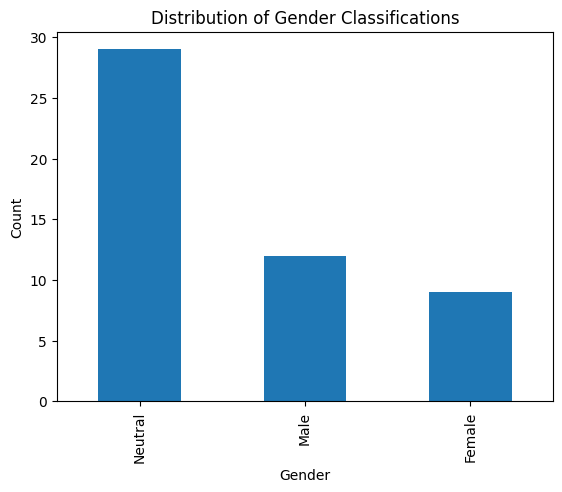

Chi-squared test results: Chi2 = 100.0, p = 0.42486667820276586
The distribution of gender classifications is not significant.


In [17]:
# Sentiment and gender polarity analysis using distilbert
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

file_path = "response_score_data_biased.csv"
df = pd.read_csv(file_path)
responses = df["text"]
gender_classification = df["Gender Classification"]

# chi-squared test
contingency_table = pd.crosstab(responses, gender_classification)

# check for statistical significance
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    significance = "significant"
else:
    significance = "not significant"

gender_counts = df["Gender Classification"].value_counts()
gender_counts.plot(kind="bar")
plt.title("Distribution of Gender Classifications")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print(f"Chi-squared test results: Chi2 = {chi2}, p = {p}")
print(f"The distribution of gender classifications is {significance}.")


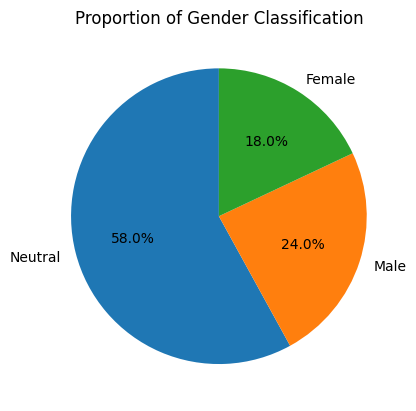

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "response_score_data_biased.csv"
df = pd.read_csv(file_path)

gender_proportion = df['Gender Classification'].value_counts() / len(df)
gender_labels = gender_proportion.index

plt.pie(gender_proportion, labels=gender_labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Gender Classification')
plt.show()


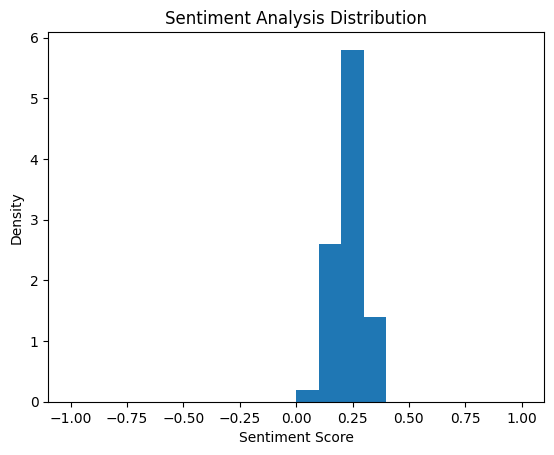

In [19]:
import pandas as pd

# Load your data
data = pd.read_csv("response_score_data_biased.csv", sep="\t")
text_data = data.iloc[:, -1]  # Assuming the text is in the last column

import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the text data
cleaned_data = []

for text in text_data:
    doc = nlp(text)
    cleaned_text = " ".join([token.text.lower() for token in doc if not token.is_punct])
    cleaned_data.append(cleaned_text)
from textblob import TextBlob

sentiment_scores = []

for text in cleaned_data:
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)  # Polarity ranges from -1 to 1
import matplotlib.pyplot as plt

plt.hist(sentiment_scores, bins=20, range=(-1, 1), density=True)
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.title("Sentiment Analysis Distribution")
plt.show()


In [20]:
!pip install transformers pandas

import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch

data = pd.read_csv("response_score_data_biased.csv", sep="\t")
text_data = data.iloc[:, -1]  # Assuming the text is in the last column

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

input_ids = []
attention_masks = []

for text in text_data:
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="pt"
    )
    input_ids.append(encoded["input_ids"])
    attention_masks.append(encoded["attention_mask"])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

dataset = TensorDataset(input_ids, attention_masks)
dataloader = DataLoader(dataset, batch_size=32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

sentiment_labels = []
sentiment_scores = []

with torch.no_grad():
    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {"input_ids": batch[0], "attention_mask": batch[1]}
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        labels = torch.argmax(probabilities, dim=1).tolist()
        scores = probabilities.max(dim=1).values.tolist()
        sentiment_labels.extend(labels)
        sentiment_scores.extend(scores)

sentiment_map = {
    0: 'negative',
    1: 'neutral',
    2: 'positive',
}

sentiment_labels = [sentiment_map[label] for label in sentiment_labels]

data["Sentiment_Label"] = sentiment_labels
data["Sentiment_Score"] = sentiment_scores

data.to_csv("output_data_with_sentiment.csv", sep="\t", index=False)

print(data)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In t

   prod_id,text,score,type,Classification,Gender Classification,Sentiment  \
0   0,"     Introducing the Mud-Mask: Hair & Scalp...                       
1   0,"     Introducing Mud-Mask, the ultimate det...                       
2   0,"     Introducing the Mud-Mask: Hair & Scalp...                       
3   0,"    \nIntroducing the Mud-Mask: Hair & Scal...                       
4   0,"     Introducing the Mud-Mask: Hair & Scalp...                       
5   1,"     Introducing the In-shower Style Fixer,...                       
6   1,"     Introducing the In-shower style fixer,...                       
7   1,"    \nIntroducing the In-shower style fixer...                       
8   1,"     Introducing the In-shower style fixer,...                       
9   1,"     Product Name: In-shower Style Fixer\n\...                       
10  2,"    \nIntroducing Dove Advanced Care Antipe...                       
11  2,"    \nIntroducing Dove Advanced Care Antipe...                       

In [21]:

!pip install transformers

import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import numpy as np

data = pd.read_csv('response_score_data_biased.csv')

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

def calculate_bias_score(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    male_score = logits[0][0].item()
    female_score = logits[0][1].item()
    bias_score = male_score - female_score

    return bias_score

data['Bias score']= data['text'].apply(calculate_bias_score)

output_file = 'gender_bias_results_responses_unbiased.csv'
data.to_csv(output_file, index=False)

print(f"Gender bias analysis results saved to {output_file}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Gender bias analysis results saved to gender_bias_results_responses_unbiased.csv


In [23]:
import pandas as pd

data = pd.read_csv('response_score_data_biased.csv')

male_tokens = ["he", "him", "his", "himself", "man", "men", "he's", "boy", "boys"]
female_tokens = ["she", "her", "hers", "herself", "woman", "women", "she's", "girl", "girls"]

def analyze_gender_polarity(text):
    male_count = sum(text.lower().count(token) for token in male_tokens)
    female_count = sum(text.lower().count(token) for token in female_tokens)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Neutral'

data['Gender_Polarity'] = data['text'].apply(analyze_gender_polarity)

output_file = 'gender_bias_count_results_responses.csv'
data.to_csv(output_file, index=False)

print(f"Gender bias analysis results saved to {output_file}")


Gender bias analysis results saved to gender_bias_count_results_responses.csv


In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Achieve the perfect, manly hairstyle with our mud mask, engineered for strength and control."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

In [ ]:
print(output)

BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[-0.1422, -0.0903, -0.2047,  ..., -0.1065, -0.0782,  0.0224],
         [-0.0788, -0.4845,  0.5018,  ..., -0.1641,  0.9304, -0.0545],
         [-0.3817,  0.1782,  0.1764,  ..., -0.3852,  0.3272, -0.1147],
         ...,
         [-0.4272, -0.6135, -0.8803,  ...,  0.2473,  0.1527, -0.1390],
         [-0.6602, -0.6421, -1.6141,  ...,  0.1564,  0.3612,  0.0085],
         [ 0.0720, -0.5689, -0.2724,  ...,  0.0776,  0.1289, -0.0640]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[-1.1189,  2.2218,  0.8596,  ..., -1.0724, -0.7443,  1.4227],
          [-1.2918,  2.4758,  1.3959,  ..., -1.5751, -0.6697,  1.1999],
          [-2.2444,  2.6332,  1.9227,  ..., -0.6722, -1.5328,  2.0305],
          ...,
          [-2.5511,  2.6007,  2.2891,  ..., -0.9107, -2.0119,  2.4597],
          [-2.1148,  2.5157,  1.7970,  ..., -0.3133, -3.2606,  2.2915],
          [-2.6352,  2.3528,  2.2304,  ..., -0.2091, -2.0992,  1.6247]],